<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task1/Task1_Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


## Importing the dataset

In [3]:
# Loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/50_Startups.csv')
X = dataset.iloc[:, :-1].values  # All columns except the last one
y = dataset.iloc[:, -1].values   # Last column (Profit)


## Feature Engineering

In [4]:
# Encoding categorical data (State column)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Training the Multiple Linear Regression model on the Training set

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

## Predicting the Test set results

In [7]:
y_pred = regressor.predict(X_test)


In [8]:
# Creating a comparison between actual and predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


      Actual      Predicted
0  103282.38  103015.201598
1  144259.40  132582.277608
2  146121.95  132447.738452
3   77798.83   71976.098513
4  191050.39  178537.482211
5  105008.31  116161.242302
6   81229.06   67851.692097
7   97483.56   98791.733747
8  110352.25  113969.435330
9  166187.94  167921.065696


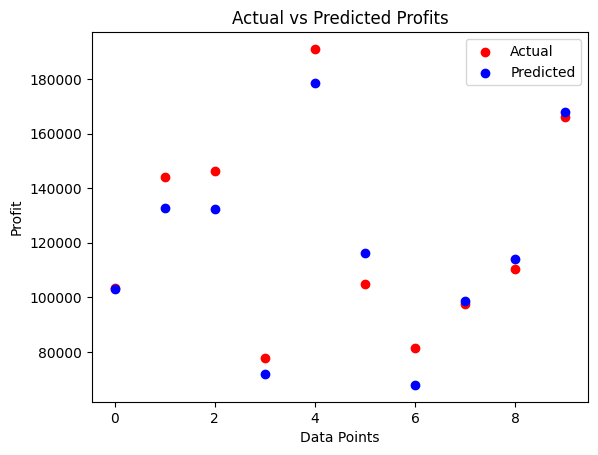

In [9]:
# 7. Visualizing the actual vs predicted values in a scatter plot
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted')
plt.title('Actual vs Predicted Profits')
plt.xlabel('Data Points')
plt.ylabel('Profit')
plt.legend()
plt.show()